In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/upi-payment-transactions-dataset/transactions.csv")

# Display the first few rows of the dataset
print(df.head())
# Check for missing values and data types
print(df.info())

                         Transaction ID            Timestamp      Sender Name  \
0  4d3db980-46cd-4158-a812-dcb77055d0d2  2024-06-22 04:06:38        Tiya Mall   
1  099ee548-2fc1-4811-bf92-559c467ca792  2024-06-19 06:04:49  Mohanlal Bakshi   
2  d4c05732-6b1b-4bab-90b9-efe09d252b99  2024-06-04 04:56:09      Kismat Bora   
3  e8df92ee-8b04-4133-af5a-5f412180c8ab  2024-06-09 09:56:07    Ayesha Korpal   
4  e7d675d3-04f1-419c-a841-7a04662560b7  2024-06-25 08:38:19      Jivin Batta   

           Sender UPI ID   Receiver Name     Receiver UPI ID  Amount (INR)  \
0      4161803452@okaxis  Mohanlal Golla    7776849307@okybl       3907.34   
1      8908837379@okaxis  Mehul Sankaran   7683454560@okaxis       8404.55   
2       4633654150@okybl       Diya Goel  2598130823@okicici        941.88   
3  7018842771@okhdfcbank    Rhea Kothari   2246623650@okaxis       8926.00   
4       1977143985@okybl     Baiju Issac    5245672729@okybl       2800.55   

    Status  
0   FAILED  
1  SUCCESS  
2  SU

In [2]:
# Handle missing values
df.dropna(inplace=True)

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract date and time components
df['Date'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour

# Display the cleaned dataframe
print(df.head())

                         Transaction ID           Timestamp      Sender Name  \
0  4d3db980-46cd-4158-a812-dcb77055d0d2 2024-06-22 04:06:38        Tiya Mall   
1  099ee548-2fc1-4811-bf92-559c467ca792 2024-06-19 06:04:49  Mohanlal Bakshi   
2  d4c05732-6b1b-4bab-90b9-efe09d252b99 2024-06-04 04:56:09      Kismat Bora   
3  e8df92ee-8b04-4133-af5a-5f412180c8ab 2024-06-09 09:56:07    Ayesha Korpal   
4  e7d675d3-04f1-419c-a841-7a04662560b7 2024-06-25 08:38:19      Jivin Batta   

           Sender UPI ID   Receiver Name     Receiver UPI ID  Amount (INR)  \
0      4161803452@okaxis  Mohanlal Golla    7776849307@okybl       3907.34   
1      8908837379@okaxis  Mehul Sankaran   7683454560@okaxis       8404.55   
2       4633654150@okybl       Diya Goel  2598130823@okicici        941.88   
3  7018842771@okhdfcbank    Rhea Kothari   2246623650@okaxis       8926.00   
4       1977143985@okybl     Baiju Issac    5245672729@okybl       2800.55   

    Status        Date  Hour  
0   FAILED  2024-06

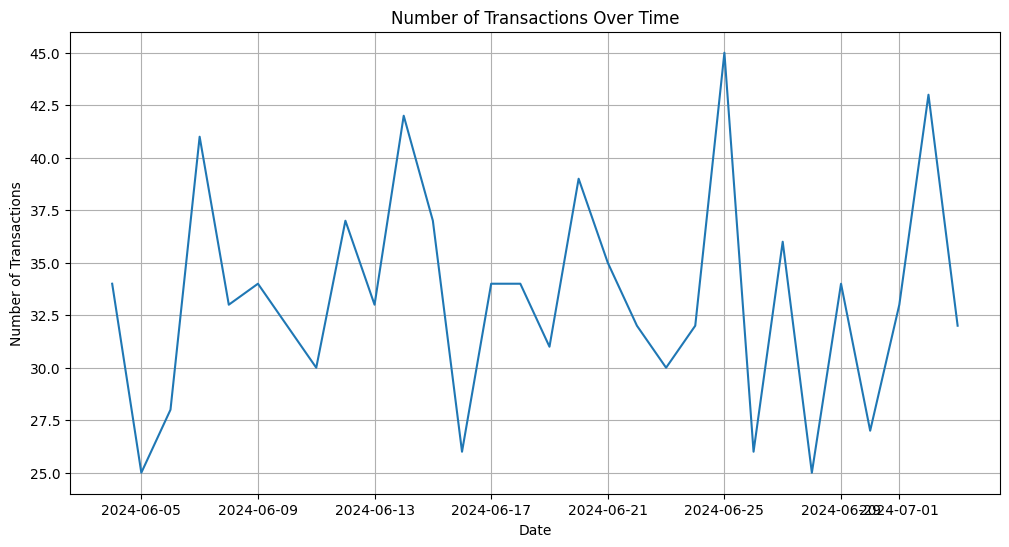

In [3]:
import matplotlib.pyplot as plt

# Plot the number of transactions over time (daily)
daily_transactions = df.groupby('Date').size()
daily_transactions.plot(kind='line', figsize=(12, 6))
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


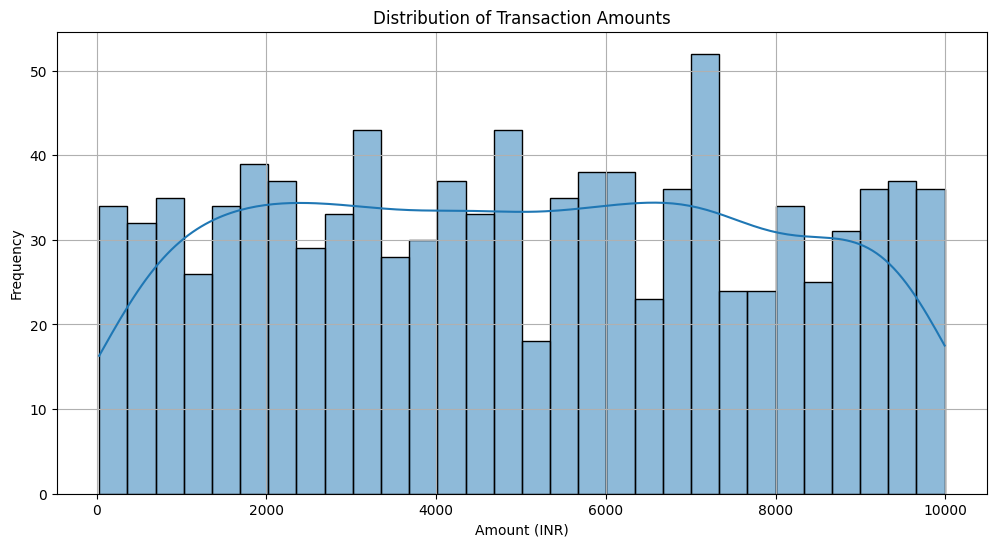

In [4]:
import seaborn as sns

# Plot the distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount (INR)'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

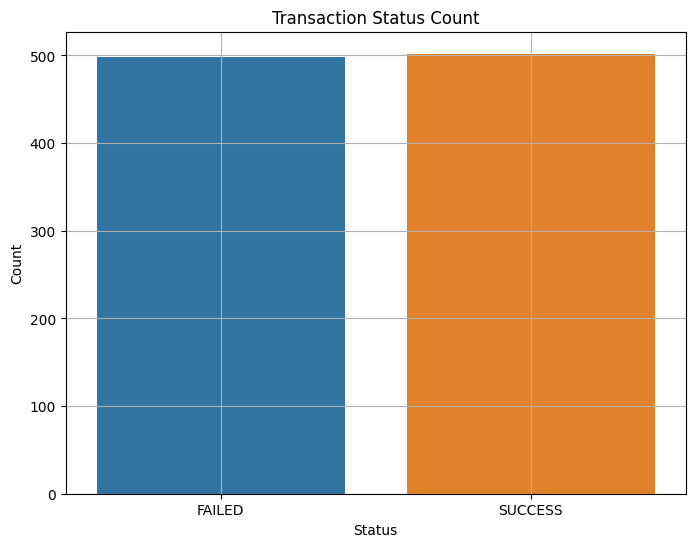

In [6]:
# Plot the count of transaction status
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df)
plt.title('Transaction Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

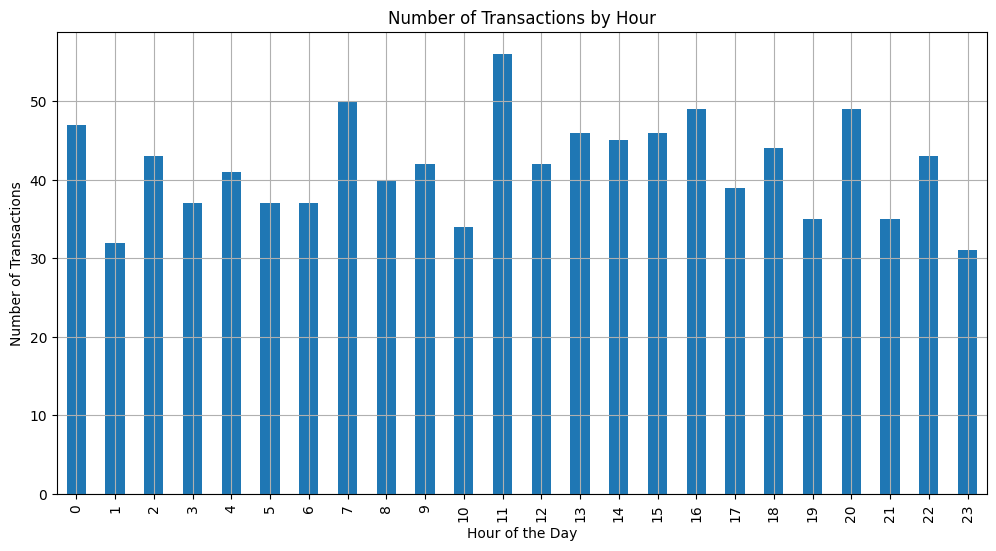

In [7]:
# Plot the number of transactions by hour
hourly_transactions = df.groupby('Hour').size()
hourly_transactions.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

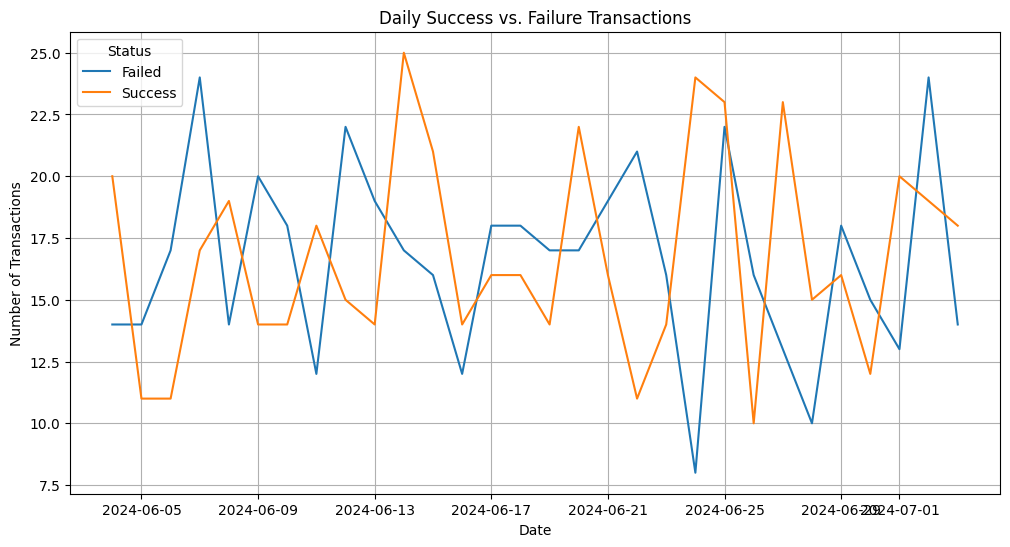

In [10]:
# Plot the number of successful and failed transactions over time
daily_status = df.groupby(['Date', 'Status']).size().unstack().fillna(0)
daily_status.plot(kind='line', figsize=(12, 6))
plt.title('Daily Success vs. Failure Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend(title='Status', labels=['Failed', 'Success'])
plt.grid(True)
plt.show()

/tmp/ipykernel_33/4122281511.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = df.set_index('Timestamp').resample('M').size()


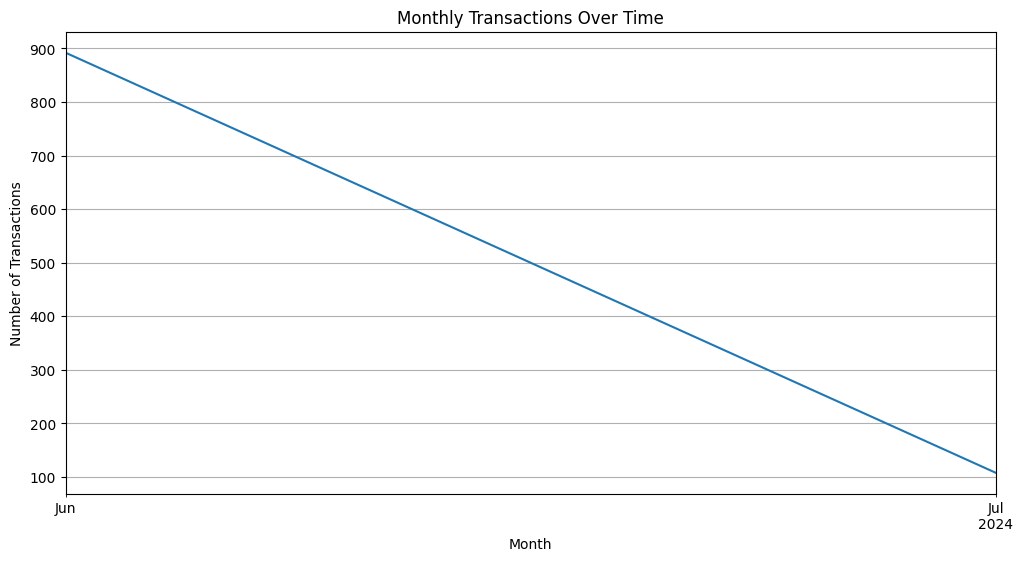

In [13]:
# Resample data to monthly frequency and plot
monthly_transactions = df.set_index('Timestamp').resample('M').size()
monthly_transactions.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

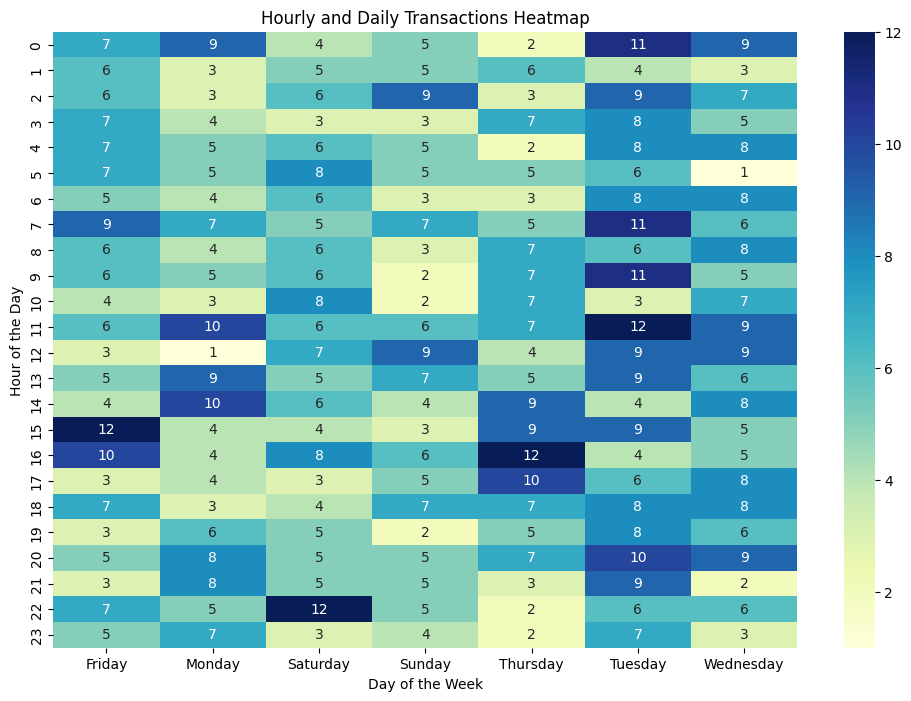

In [17]:


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_daily_transactions, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Hourly and Daily Transactions Heatmap')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

NameError: name 'decomposition' is not defined

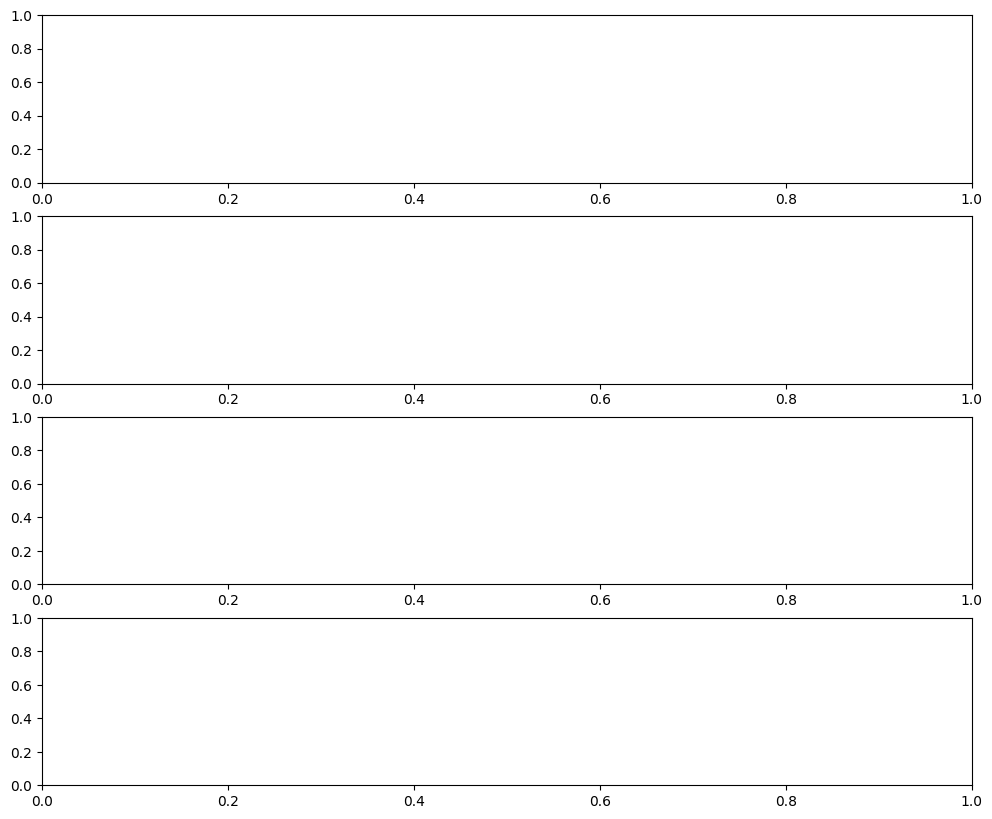

In [19]:


# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


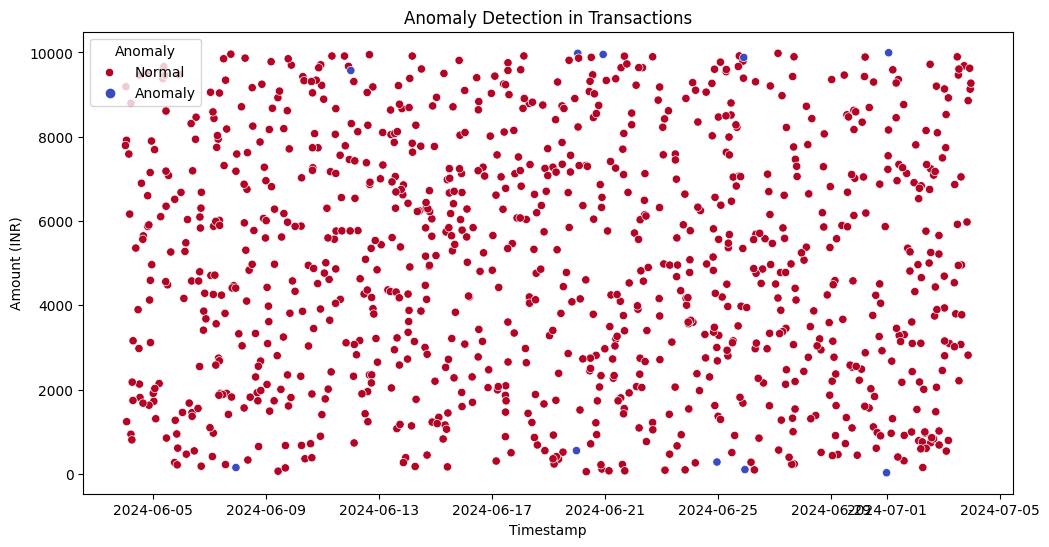

In [20]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01)
df['Anomaly'] = iso_forest.fit_predict(df[['Amount (INR)', 'Hour']])

# Plot anomalies
anomalies = df[df['Anomaly'] == -1]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Timestamp', y='Amount (INR)', hue='Anomaly', data=df, palette='coolwarm')
plt.title('Anomaly Detection in Transactions')
plt.xlabel('Timestamp')
plt.ylabel('Amount (INR)')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()